In [55]:
###Import the numpy and pandas 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
%matplotlib inline

In [57]:
##read the csv files
df=pd.read_csv("oct_nov_churned.csv")

In [58]:
##Remove the registrationid column
df=df.drop(['registrationcontactid'], axis=1)

# Probability to Churn in the Training Dataset
The probability to Churn in the dataset is 1% which is quite low. So even if we do not build any model and as a prediction we assign the **Churned equal to zero to all observations** then the **Accuracy** of our model will be **99%** 

In [59]:
### Probability to Churn
print round(df.churned.mean()*100,2), '%'

1.09 %


### Goal of the Analysis
In this case we do not case so much about the **Accuracy** of the Predictive Model but mainly for the **Sensitivity** and then for the **Specificity**
Below you can find the definition of those statistical measures:
+ **Sensitivity** (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).
+ **Specificity** (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

# Data Cleaning
The dataset consists of 58 columns. We will need to clean, remove, transform some of the columns

There are some sparse columns with many NaN values and we would like to remove them from our analysis

In [60]:
## Number of NaN Values per column in the Train Dataset
df.isnull().sum()

churned                                       0
score                                         0
energy_efficiency                             0
water_efficiency                              0
number_of_311_complains_past_year             0
number_of_311_complains_2_years_prior         0
number_of_ecb_violations_last_year            0
number_of_ecb_violations_2_years_prior        0
hmcv_violations_past_year_class_a             0
hmcv_violations_past_year_class_b             0
hmcv_violations_past_year_class_c             0
hmcv_violations_2_years_prior_class_a         0
hmcv_violations_2_years_prior_class_b         0
hmcv_violations_2_years_prior_class_c         0
total_resolve_time                          777
total_violations                              0
violations_open                               0
violations_open_last_year                     0
violations_2_years_prior                      0
hearing_outcomes                           1006
registered                              

In [61]:
AllColumns=list(df.columns)
isgreater=DataFrame(df.isnull().sum()>1000)
RemoveColumns=list(isgreater.loc[isgreater[0]==True,].index)
KeepColumns=list(isgreater.loc[isgreater[0]==False,].index)

In [62]:
### Keep only the columns with less than 1000 NaN values
df=df[KeepColumns]

In [63]:
df.head()

,churned,score,energy_efficiency,water_efficiency,number_of_311_complains_past_year,number_of_311_complains_2_years_prior,number_of_ecb_violations_last_year,number_of_ecb_violations_2_years_prior,hmcv_violations_past_year_class_a,hmcv_violations_past_year_class_b,...,avg_resolve_time,hearing_outcomes-2,class_a_per_unit,class_b_per_unit,class_c_per_unit,percent_registered,average_energy,average_water,management_ranking,corporationname
0,0,402.64,263.65,134.99,1,2,0,0,0,0,...,44.97479,-0.986111,0.04,0.04,0.0,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
1,0,398.64,263.65,134.99,0,0,0,0,0,0,...,44.97479,-0.986111,0.04,0.04,0.0,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
2,0,398.64,263.65,134.99,0,0,0,0,0,0,...,44.97479,-0.986111,0.04,0.04,0.0,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
3,0,398.64,263.65,134.99,0,0,0,0,0,0,...,44.97479,-0.986111,0.04,0.04,0.0,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT
4,0,403.64,263.65,134.99,1,3,0,0,0,0,...,44.97479,-0.986111,0.04,0.04,0.0,0.39,263.65,134.99,401.833548,COLBY PROPERTY MANAGEMENT


In [64]:
### The columns that we removed
RemoveColumns

['hearing_outcomes',
 'percent_condo_portfolio',
 'percent_coop_portfolio',
 'percent_genpart_portfolio',
 'percent_llc_portfolio',
 'percent_corp_portfolio',
 'percent_indiv_portfolio',
 'percent_condominium_portfolio',
 'percent_joint_portfolio',
 'percent_lp_portfolio',
 'percent_hdfc_portfolio']

There are also some columns with almost zero variance and we would like to remove them from our analysis

In [65]:
##Get the columns with a variance less than 5
lowvariance=DataFrame(df.std()<5)
##But Keep the column Churned
lowvariance=lowvariance[1:]
lowvariance
RemoveColumns=list(lowvariance.loc[lowvariance[0]==True,].index)
KeepColumns=list(lowvariance.loc[lowvariance[0]==False,].index)

In [66]:
### Keep only the columns with a variance greater than 5
df=df.drop(RemoveColumns, axis=1)


In [67]:
### The extra columns that we removed
RemoveColumns

['number_of_ecb_violations_last_year',
 'number_of_ecb_violations_2_years_prior',
 'hmcv_violations_past_year_class_a',
 'hmcv_violations_past_year_class_b',
 'hmcv_violations_past_year_class_c',
 'hmcv_violations_2_years_prior_class_a',
 'hmcv_violations_2_years_prior_class_b',
 'hmcv_violations_2_years_prior_class_c',
 'violations_open_last_year',
 'violations_2_years_prior',
 'communityboard',
 'dobbuildingclassid',
 'hearing_outcomes-2',
 'class_a_per_unit',
 'class_b_per_unit',
 'class_c_per_unit',
 'percent_registered']

Now we would like to remove some other columns that are not variables which can be used in ML algorithms like the building, housenumber etc

In [68]:
RemoveColumns=['buildingid', 'housenumber', 'streetname', 'boro', 'zip', 'firstname', 'lastname', 'corporationname']
df=df.drop(RemoveColumns, axis=1)


In [69]:
df.isnull().sum()

churned                                    0
score                                      0
energy_efficiency                          0
water_efficiency                           0
number_of_311_complains_past_year          0
number_of_311_complains_2_years_prior      0
total_resolve_time                       777
total_violations                           0
violations_open                            0
registered                                 0
legalstories                               0
legalclassa                                1
legalclassb                              625
recordstatus                               0
contactdescription                         0
units                                     53
number_buildings                           0
avg_resolve_time                          41
average_energy                             0
average_water                              0
management_ranking                         0
dtype: int64

Still there are some columns with NaN values. We need to replace those values. For this scope we will replace them with the mean values

In [70]:
###Replace the NaN values of the Train and Test Dataset with the Average Values of the Train dataset

###For the train dataset
df.loc[df.total_resolve_time.isnull(),['total_resolve_time']]=df.total_resolve_time.mean()
df.loc[df.legalclassb.isnull(),['legalclassb']]=df.legalclassb.mean()
df.loc[df.legalclassa.isnull(),['legalclassa']]=df.legalclassa.mean()
df.loc[df.units.isnull(),['units']]=df.units.mean()
df.loc[df.avg_resolve_time.isnull(),['avg_resolve_time']]=df.avg_resolve_time.mean()


In [71]:
###check if there are any NaN values left
df.isnull().sum()

churned                                  0
score                                    0
energy_efficiency                        0
water_efficiency                         0
number_of_311_complains_past_year        0
number_of_311_complains_2_years_prior    0
total_resolve_time                       0
total_violations                         0
violations_open                          0
registered                               0
legalstories                             0
legalclassa                              0
legalclassb                              0
recordstatus                             0
contactdescription                       0
units                                    0
number_buildings                         0
avg_resolve_time                         0
average_energy                           0
average_water                            0
management_ranking                       0
dtype: int64

# Transform the Categorical Variables into Dummies

For the Logistic Regression we need to transform the Categorical Variable into Dummy Variables with 0, 1. Also we have to remove the reference revel from the model 

In [72]:
# Create new DataFrames for the Categorical Variables
registered_dummies=pd.get_dummies(df['registered'])
recordstatus_dummies=pd.get_dummies(df['recordstatus'])
contactdescription_dummies=pd.get_dummies(df['contactdescription'])

In [73]:
###lets have a look of our new columns
registered_dummies.head()

,NO,YES
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [74]:
recordstatus_dummies.head()

,Active,Inactive
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [75]:
contactdescription_dummies.head()

,CO-OP,CONDO
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [76]:
###Give some meaningful names to the dummy columns
registered_dummies.columns=['No_Registered', 'Registered']
recordstatus_dummies.columns=['Status_Active', 'Status_Inactive']
contactdescription_dummies.columns=['Contract_COOP', 'Contract_CONDO']

In [77]:
###Remove the columns from the dataset
df=df.drop(['registered', 'recordstatus', 'contactdescription' ], axis=1)

In [78]:
###Add the Dummy Columns
df=pd.concat([df,registered_dummies, recordstatus_dummies, contactdescription_dummies], axis=1 )

In [79]:
df.head()

,churned,score,energy_efficiency,water_efficiency,number_of_311_complains_past_year,number_of_311_complains_2_years_prior,total_resolve_time,total_violations,violations_open,legalstories,...,avg_resolve_time,average_energy,average_water,management_ranking,No_Registered,Registered,Status_Active,Status_Inactive,Contract_COOP,Contract_CONDO
0,0,402.64,263.65,134.99,1,2,4.000000,3,0,2,...,44.97479,263.65,134.99,401.833548,0.0,1.0,1.0,0.0,0.0,1.0
1,0,398.64,263.65,134.99,0,0,2640.456122,0,0,2,...,44.97479,263.65,134.99,401.833548,0.0,1.0,1.0,0.0,0.0,1.0
2,0,398.64,263.65,134.99,0,0,2640.456122,0,0,3,...,44.97479,263.65,134.99,401.833548,0.0,1.0,1.0,0.0,0.0,1.0
3,0,398.64,263.65,134.99,0,0,2640.456122,0,0,3,...,44.97479,263.65,134.99,401.833548,0.0,1.0,1.0,0.0,0.0,1.0
4,0,403.64,263.65,134.99,1,3,511.000000,4,0,3,...,44.97479,263.65,134.99,401.833548,0.0,1.0,1.0,0.0,0.0,1.0


### Multicollinearity
We will need to remove the reference level of the dummies

In [80]:
df=df.drop(['Status_Inactive', 'No_Registered', 'Contract_COOP' ], axis=1)
df.head()

,churned,score,energy_efficiency,water_efficiency,number_of_311_complains_past_year,number_of_311_complains_2_years_prior,total_resolve_time,total_violations,violations_open,legalstories,...,legalclassb,units,number_buildings,avg_resolve_time,average_energy,average_water,management_ranking,Registered,Status_Active,Contract_CONDO
0,0,402.64,263.65,134.99,1,2,4.000000,3,0,2,...,0.0,50.0,31,44.97479,263.65,134.99,401.833548,1.0,1.0,1.0
1,0,398.64,263.65,134.99,0,0,2640.456122,0,0,2,...,0.0,50.0,31,44.97479,263.65,134.99,401.833548,1.0,1.0,1.0
2,0,398.64,263.65,134.99,0,0,2640.456122,0,0,3,...,0.0,50.0,31,44.97479,263.65,134.99,401.833548,1.0,1.0,1.0
3,0,398.64,263.65,134.99,0,0,2640.456122,0,0,3,...,0.0,50.0,31,44.97479,263.65,134.99,401.833548,1.0,1.0,1.0
4,0,403.64,263.65,134.99,1,3,511.000000,4,0,3,...,0.0,50.0,31,44.97479,263.65,134.99,401.833548,1.0,1.0,1.0


# Split the Dataset into Train and Test 

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [104]:
###Create the dataframe of X's where we will need to remove the churned column
X=df.drop(['churned'], axis=1)
Y=df.churned
Y=np.ravel(Y)  ##TRANSFORM TO AN 1D array


In [105]:
#Create a Logistic Regression Class object
logreg=LogisticRegression()

seed=101
#Split the data into Training and Testing sets with a ratio of 80-20
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=3)

In [106]:
#Train the model with the training set
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### The Accuracy of the Model is 99.13%

In [111]:
from sklearn import metrics
Y_pred=logreg.predict(X_test)

In [112]:
print metrics.accuracy_score(Y_test, Y_pred)

0.991354466859


### Below are the Coefficients of the Model

In [113]:
coeff_df=DataFrame(zip(X.columns, np.transpose(logreg.coef_)))

In [114]:
coeff_df

,0,1
0,score,[0.00399404482677]
1,energy_efficiency,[-0.0104135477997]
2,water_efficiency,[-0.00578257821997]
3,number_of_311_complains_past_year,[0.000971440333778]
4,number_of_311_complains_2_years_prior,[-0.0089268724696]
5,total_resolve_time,[-1.79846700848e-05]
6,total_violations,[-0.00120540130923]
7,violations_open,[0.0016021711796]
8,legalstories,[-0.0462085104824]
9,legalclassa,[-0.00401804545934]


### Comments regarding the model
Based on the Accuracy the model is almost perfect. The problem is that it cannot capture the cases where the Churned is 1. As we can see below all the prediction were Churned equal to 0.
The maximum probability of somebody to churn based on the model was 38.44%

In [136]:
sum(Y_pred)

0

In [137]:
Y_pred.max()

0

In [138]:
prob_matrix=DataFrame(logreg.predict_proba(X_test))

In [139]:
prob_matrix[1].max()

0.38447377411899941

### Confusion Matrix

In [143]:
from sklearn.metrics import confusion_matrix

cnf_matrix =confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm=cm.round(2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### From the Confusion Matrix below we can see that a we were not able to detect the 18 churned cases of the test dataset

Confusion matrix, without normalization
[[2064    0]
 [  18    0]]


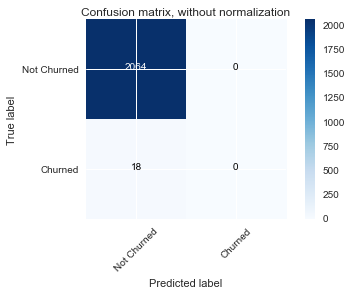

In [145]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Churned', 'Churned'],
                      title='Confusion matrix, without normalization')

### A Different Approach
A different approach could be to classify the users as "Churned" using a lower threshold, thus instead of a threashold of 50% we can apply a threshold of **10%** and we will see the resutls

In [203]:
Y_Prob=DataFrame(logreg.predict_proba(X_test))

In [204]:
Y_Pred2=Y_Prob[1]>0.1
d={True:1, False:0}
Y_Pred2=Y_Pred2.map(d)

In [205]:
Y_Pred2.sum()

4L

In [206]:
cnf_matrix =confusion_matrix(Y_test, Y_Pred2)

Confusion matrix, without normalization
[[2060    4]
 [  18    0]]


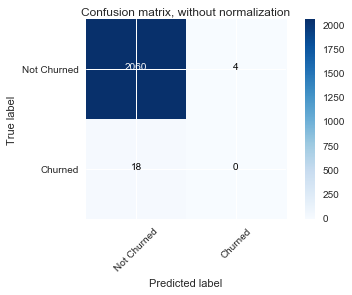

In [207]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not Churned', 'Churned'],
                      title='Confusion matrix, without normalization')

### Comments
We tried to reduce the threshold of 50% to 10% and we predicted 4 churned cases BUT those cases were False Positive prediction. From the dataset that we have it seems that we are not able to increase the **Specificity** of the model 

In [211]:
ProbDF=pd.concat([Y_Prob[1], DataFrame(Y_test)], axis=1)

In [213]:
ProbDF.columns=['Probability', 'Churned']

In [221]:
ProbDF.sort_values('Churned', ascending=False)

,Probability,Churned
1417,0.020528,1
1701,0.022560,1
1645,0.018834,1
1255,0.020084,1
1065,0.014453,1
1338,0.013398,1
1252,0.021222,1
342,0.014472,1
1135,0.057529,1
1862,0.006219,1


In [222]:
ProbDF.loc[ProbDF.Churned==1,]

,Probability,Churned
10,0.003416,1
342,0.014472,1
386,0.077652,1
405,0.018440,1
464,0.038625,1
663,0.014984,1
1035,0.006891,1
1065,0.014453,1
1135,0.057529,1
1157,0.019200,1


In [226]:
ProbDF.loc[ProbDF.Churned==1, ['Probability']].mean()

Probability    0.02271
dtype: float64

In [227]:
ProbDF.loc[ProbDF.Churned!=1, ['Probability']].mean()

Probability    0.012133
dtype: float64